In [72]:
%matplotlib inline

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Model Training
## Regression: Live Demos

In [74]:
mpg_data = pd.read_fwf("auto-mpg.data", header = None, na_values = ["?"])

In [75]:
mpg_data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [76]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [77]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [78]:
mpg_data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [79]:
mpg_data.shape

(398, 9)

In [80]:
mpg_data = mpg_data.dropna(how='any')

In [81]:
mpg_data.shape

(392, 9)

In [82]:
mpg_data = mpg_data.drop("car name", axis = 1)

In [83]:
mpg_data_attributes = mpg_data.drop("mpg", axis = 1)
mpg_data_target = mpg_data["mpg"]

In [84]:
mpg_data_attributes_scaled = MinMaxScaler().fit_transform(mpg_data_attributes)

In [85]:
mpg_data_attributes_scaled.min(axis = 0), mpg_data_attributes_scaled.max(axis = 0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

In [86]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

LinearRegression()

In [87]:
linear_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.8214780764810597

In [88]:
l2_regression = Ridge()
l2_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

Ridge()

In [89]:
l2_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.8164896635931873

In [90]:
l1_regression = Lasso()
l1_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

Lasso()

In [91]:
l1_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.4854235870676169

In [113]:
l1_regression = Lasso(alpha = 0.01)
l1_regression.fit(mpg_data_attributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.819294163777842

In [117]:
l1_regression.coef_, l1_regression.intercept_

(array([ -0.46572258,   1.53971283,  -1.7654815 , -20.45830202,
          0.49479522,   8.85158538,   2.46074875]),
 26.307290598305272)

In [118]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [131]:
mpg_data_attributes_scaled_train, mpg_data_attributes_scaled_test, mpg_data_target_train, mpg_data_target_test = train_test_split(
    mpg_data_attributes_scaled, mpg_data_target, train_size = 0.7)

In [132]:
mpg_data_attributes_scaled_train.shape, mpg_data_attributes_scaled_test.shape

((274, 7), (118, 7))

In [133]:
mpg_data_target_train.shape, mpg_data_target_test.shape

((274,), (118,))

In [168]:
linear_regression.fit(mpg_data_attributes_scaled_train, mpg_data_target_train)

LinearRegression()

In [169]:
linear_regression.score(mpg_data_attributes_scaled_train, mpg_data_target_train)

0.8174373827085025

In [170]:
linear_regression.score(mpg_data_attributes_scaled_test, mpg_data_target_test)

0.823622800485726

In [171]:
predicted_mpgs = linear_regression.predict(mpg_data_attributes_scaled_test)

<function matplotlib.pyplot.show(close=None, block=None)>

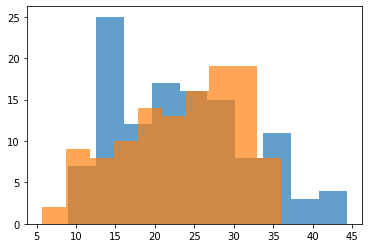

In [172]:
plt.hist(mpg_data_target_test, alpha = 0.7)
plt.hist(predicted_mpgs, alpha = 0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

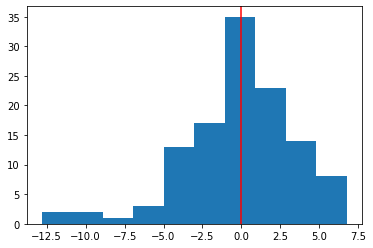

In [173]:
plt.hist(predicted_mpgs - mpg_data_target_test)
plt.axvline([0], c="r")
plt.show

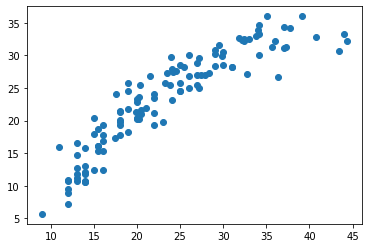

In [174]:
plt.scatter(mpg_data_target_test, predicted_mpgs)

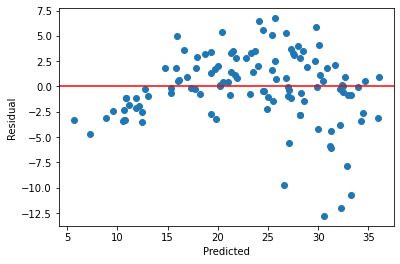

In [151]:
plt.scatter(predicted_mpgs, predicted_mpgs - mpg_data_target_test)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline([0], c="r")
plt.show()